## Prediction of stock Prices

This is an attempt to predict stock prices from NSE India with the various techniques to identify the best prediction method.

The following prediction techniques have been implemented:
Moving Average
Linear Regression
k-Nearest Neighbors
Pyramid ARIMA
Prophet
Long Short Term Memory (LSTM)

In [1]:
#import packages
import pandas as pd
import numpy as np

In [2]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
#setting figure size
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 20,10

In [4]:
#for normalizing data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [5]:
#read the file
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

In [6]:
#print the head
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-10-08,208.00,222.25,206.85,216.00,215.15,4642146.0,10062.83
1,2018-10-05,217.00,218.60,205.90,210.25,209.20,3519515.0,7407.06
2,2018-10-04,223.50,227.80,216.15,217.25,218.20,1728786.0,3815.79
3,2018-10-03,230.00,237.50,225.75,226.45,227.60,1708590.0,3960.27
4,2018-10-01,234.55,234.60,221.05,230.30,230.90,1534749.0,3486.05


In [7]:
#setting index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


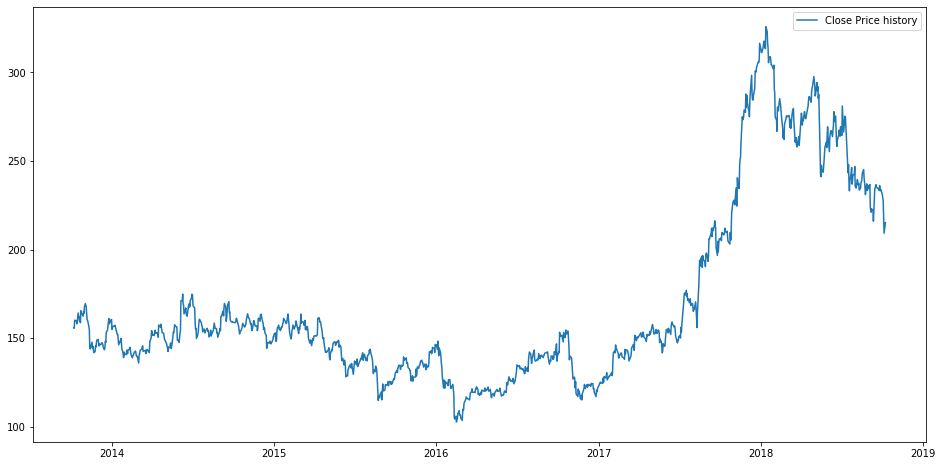

In [8]:
#plot
plt.figure(figsize=(16,8))
plt.plot(df['Close'], label='Close Price history')
plt.legend()
plt.show()

In [9]:
# importing libraries
import pandas as pd
import numpy as np

# reading the data
df = pd.read_csv('NSE-TATAGLOBAL11.csv')

# looking at the first five rows of the data
print(df.head())
print('\n Shape of the data:')
print(df.shape)

# setting the index as date
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe with date and the target variable
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
     new_data['Date'][i] = data['Date'][i]
     new_data['Close'][i] = data['Close'][i]

# NOTE: While splitting the data into train and validation set, we cannot use random splitting since that will destroy the time component. So here we have set the last year’s data into validation and the 4 years’ data before that into train set.

# splitting into train and validation
train = new_data[:987]
valid = new_data[987:]

# shapes of training set
print('\n Shape of training set:')
print(train.shape)

# shapes of validation set
print('\n Shape of validation set:')
print(valid.shape)

# In the next step, we will create predictions for the validation set and check the RMSE using the actual values.
# making predictions
preds = []
for i in range(0,valid.shape[0]):
    a = train['Close'][len(train)-248+i:].sum() + sum(preds)
    b = a/248
    preds.append(b)

# checking the results (RMSE value)
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-preds),2)))
print('\n RMSE value on validation set:')
print(rms)

         Date    Open    High     Low    Last   Close  Total Trade Quantity  \
0  2018-10-08  208.00  222.25  206.85  216.00  215.15             4642146.0   
1  2018-10-05  217.00  218.60  205.90  210.25  209.20             3519515.0   
2  2018-10-04  223.50  227.80  216.15  217.25  218.20             1728786.0   
3  2018-10-03  230.00  237.50  225.75  226.45  227.60             1708590.0   
4  2018-10-01  234.55  234.60  221.05  230.30  230.90             1534749.0   

   Turnover (Lacs)  
0         10062.83  
1          7407.06  
2          3815.79  
3          3960.27  
4          3486.05  

 Shape of the data:
(1235, 8)

 Shape of training set:
(987, 2)

 Shape of validation set:
(248, 2)

 RMSE value on validation set:
104.51415465984348


/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


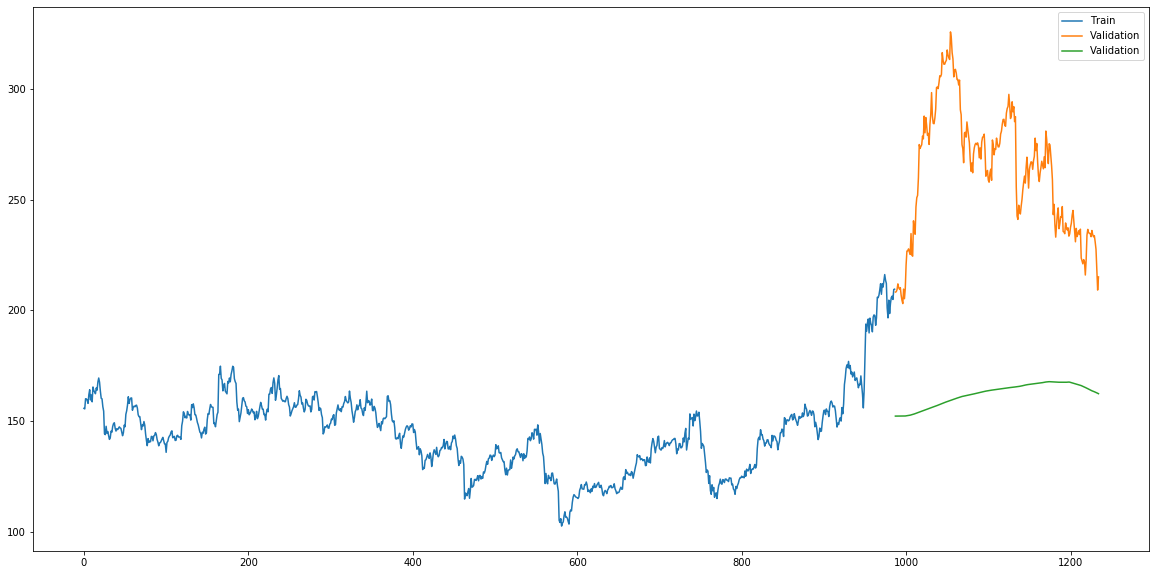

In [10]:
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label='Validation')
plt.legend()
plt.show()

In [11]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]



# Linear Regression 

The most basic machine learning algorithm that can be implemented on this data is linear regression. The linear regression model returns an equation that determines the relationship between the independent variables and the dependent variable.

The equation for linear regression can be written as:

                                       Y=θ1x1+θ2x2+....+θnxn

Here, x1, x2,….ccc represent the independent variables while the coefficients θ1, θ2, …. θn  represent the weights.

Fastai library has been used to identify the given day.

,DATE,DEXCAUS
0,2016-01-01,NaN
1,2016-01-04,1.3970
2,2016-01-05,1.3991
3,2016-01-06,1.4084
4,2016-01-07,1.4061


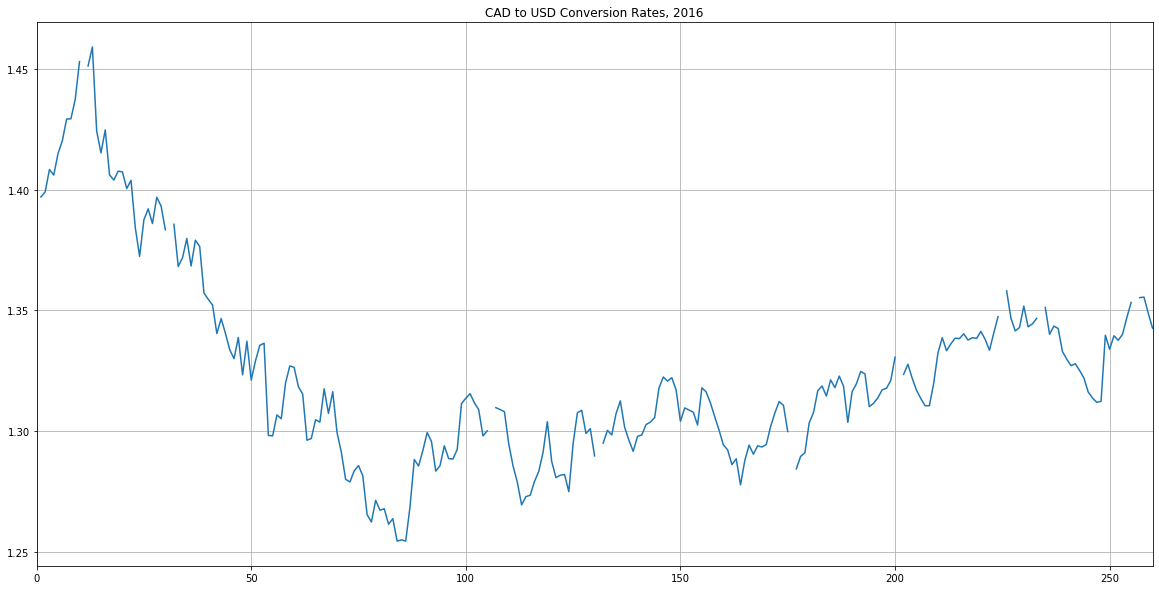

In [12]:
#following steps works with conda_amazonei_mxnet_p36 kernel
#!pip install git+https://github.com/fastai/fastai@2e1ccb58121dc648751e2109fc0fbf6925aa8887
#!apt update && apt install -y libsm6 libxext6


#Steps for coda_tensorflow_p36 kernel
!pip install http://download.pytorch.org/whl/cpu/torch-1.0.0-cp36-cp36m-linux_x86_64.whl
!pip install fastai
!pip install pandas-summary


!pip install pandas_datareader



from fastai.imports import *

#following steps works with conda_amazonei_mxnet_p36 kernel
#from fastai.structured import *
#from fastai.structured import add_datepart

#following steps works with coda_tensorflow_p36 kernel
from fastai.tabular import *
from fastai.tabular import add_datepart


from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
#from fastai.structured import add_datepart

import datetime
import pandas as pd
from pandas_datareader import data



# Set source and rate of interest
source = 'fred'
rate = 'DEXCAUS'

# Date range is 2016
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2016, 12, 31)
cadusd = data.DataReader(rate, source, start, end)

# Write it to a CSV 
cadusd.to_csv('cadusd.csv')

# Read the CSV back in (there is a peculiarity accounting for this)
cadusd = pd.read_csv('cadusd.csv')

# Set datetime precision to 'day'
cadusd['DATE'] = cadusd['DATE'].astype('datetime64[D]')

cadusd['DEXCAUS'].plot(kind='line', grid=True, title='CAD to USD Conversion Rates, 2016')
cadusd.head()


Use the below method if Fastai library fails

In [13]:
#def add_datepart(df, fldname, drop=False):
#    fld = df[fldname]
#    if not np.issubdtype(fld.dtype, np.datetime64):
#        df[fldname] = fld = pd.to_datetime(fld, infer_datetime_format=True)
#    targ_pre = re.sub('[Dd]ate$', '', fldname)
#    for n in ('Year', 'Month', 'Week', 'Day', 'Dayofweek', 'Dayofyear',
#            'Is_month_end', 'Is_month_start', 'Is_quarter_end', 'Is_quarter_start', 'Is_year_end', 'Is_year_start'):
#        df[targ_pre+n] = getattr(fld.dt,n.lower())
#    df[targ_pre+'Elapsed'] = fld.astype(np.int64) // 10**9
#    if drop: df.drop(fldname, axis=1, inplace=True)

In [14]:
#add_datepart(cadusd, 'DATE')
#cadusd.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [15]:
#setting index as date values
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#sorting
data = df.sort_index(ascending=True, axis=0)

#creating a separate dataset
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

In [16]:
#create features
#following steps works with conda_amazonei_mxnet_p36 kernel
#from fastai.structured import  add_datepart

#following steps works with coda_tensorflow_p36 kernel
from fastai.tabular import add_datepart

add_datepart(new_data, 'Date')
new_data.drop('Elapsed', axis=1, inplace=True)  #elapsed will be the time stamp

In [17]:
#split into train and validation
train = new_data[:987]
valid = new_data[987:]

x_train = train.drop('Close', axis=1)
y_train = train['Close']
x_valid = valid.drop('Close', axis=1)
y_valid = valid['Close']

#implement linear regression
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
#make predictions and find the rmse
preds = model.predict(x_valid)
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

121.16382449873643

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


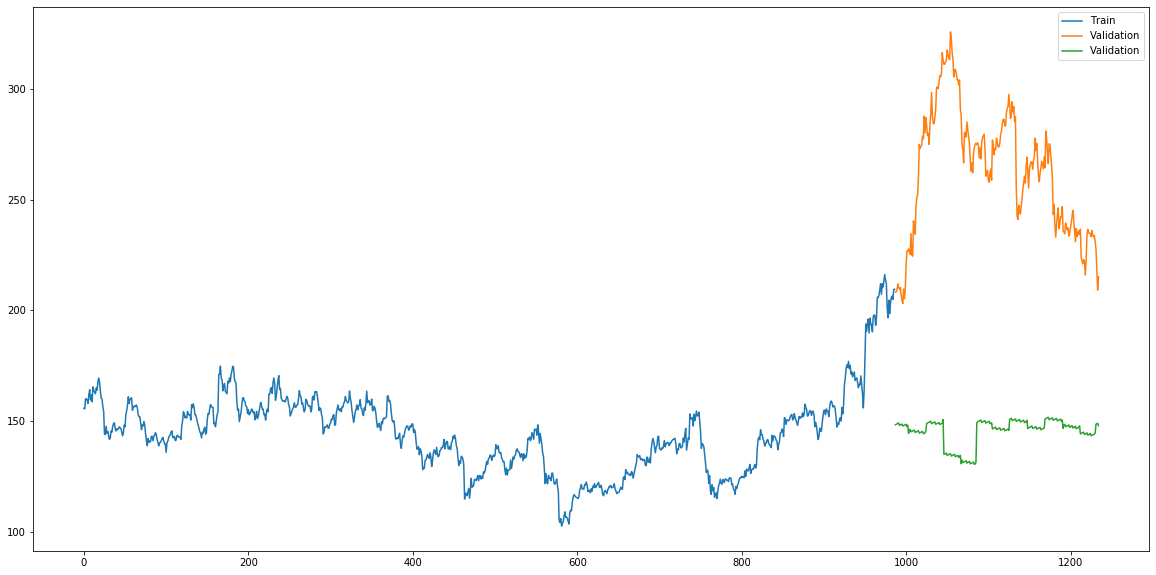

In [19]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds

valid.index = new_data[987:].index
train.index = new_data[:987].index

plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label='Validation')
plt.legend()
plt.show()

## k-Nearest Neighbours

KNN is based on the independent variables, kNN finds the similarity between new data points and old data points. 


In [20]:
#importing libraries
from sklearn import neighbors
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [21]:
#scaling data
x_train_scaled = scaler.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scaled)
x_valid_scaled = scaler.fit_transform(x_valid)
x_valid = pd.DataFrame(x_valid_scaled)

#using gridsearch to find the best parameter
params = {'n_neighbors':[2,3,4,5,6,7,8,9]}
knn = neighbors.KNeighborsRegressor()
model = GridSearchCV(knn, params, cv=5)

#fit the model and make predictions
model.fit(x_train,y_train)
preds = model.predict(x_valid)

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [22]:
#rmse
rms=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
rms

114.820692914522

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


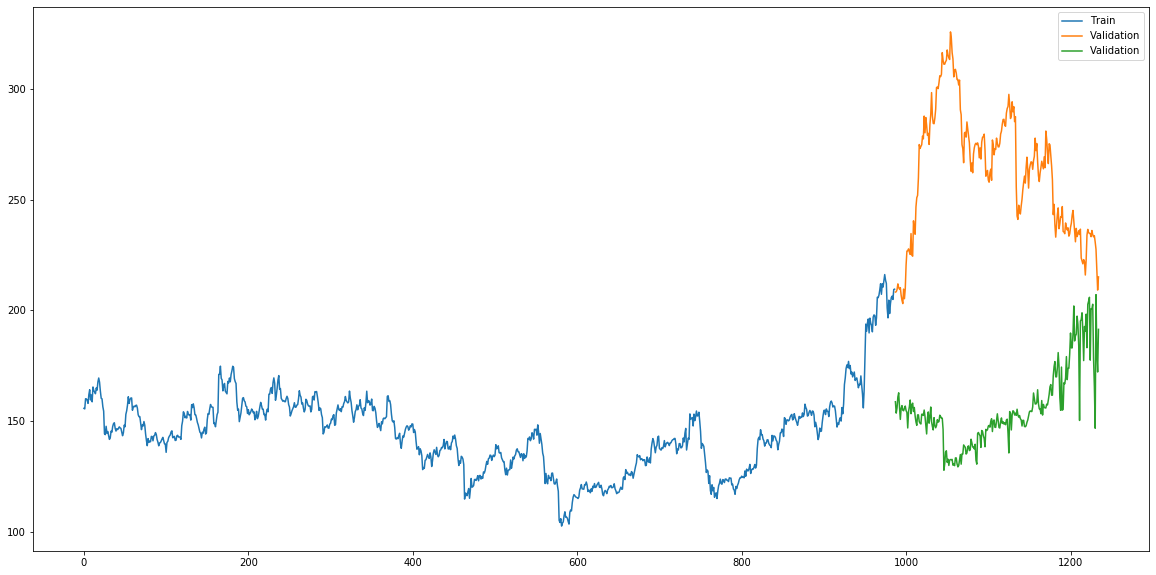

In [23]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = preds
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close', 'Predictions']], label='Validation')
plt.legend()
plt.show()

In [24]:
#!pip uninstall pyramid-arima --yes

##Steps for coda_tensorflow_p36 kernel (run this and restart kernel)
!pip3 uninstall statsmodels -y
!pip3 install statsmodels==0.10.0rc2 --pre --user

Uninstalling statsmodels-0.10.1:
  Successfully uninstalled statsmodels-0.10.1
  Using cached https://files.pythonhosted.org/packages/ab/f5/6bb191bb31574f59b42ee10278a8d002e5be4055d41f9af86d682b8c63b6/statsmodels-0.10.0rc2-cp36-cp36m-manylinux1_x86_64.whl
ERROR: pmdarima 1.3.0 has requirement statsmodels>=0.10.0, but you'll have statsmodels 0.10.0rc2 which is incompatible.


## Pyramid Arima 

ARIMA is a very popular statistical method for time series forecasting. ARIMA models take into account the past values to predict the future values. There are three important parameters in ARIMA:

p (past values used for forecasting the next value)
q (past forecast errors used to predict the future values)
d (order of differencing)

Parameter tuning for ARIMA consumes a lot of time. So we will use auto ARIMA which automatically selects the best combination of (p,q,d) that provides the least error.

In [25]:
#following steps works with conda_amazonei_mxnet_p36 kernel
#!pip install pyramid-arima
#from pyramid.arima import auto_arima

#Steps for coda_tensorflow_p36 kernel

#!pip install scipy==1.2.2 --upgrade
#!pip install statsmodels scipy
#!pip install torch==1.2 --upgrade
#!pip install statsmodels==0.9.0 --upgrade
#!pip install --upgrade Cython
#!pip install --upgrade git+https://github.com/statsmodels/statsmodels
!pip install pmdarima
from pmdarima import AutoARIMA, auto_arima



data = df.sort_index(ascending=True, axis=0)

train = data[:987]
valid = data[987:]

training = train['Close']
validation = valid['Close']

model = auto_arima(training, start_p=1, start_q=1,max_p=3, max_q=3, m=12,start_P=0, seasonal=True,d=1, D=1, trace=True,error_action='ignore',suppress_warnings=True)
model.fit(training)

forecast = model.predict(n_periods=248)
forecast = pd.DataFrame(forecast,index = valid.index,columns=['Prediction'])

  Using cached https://files.pythonhosted.org/packages/60/d6/e9859e68e7d6c916fdff7d8e0958a7f5813485c52fc20d061273eaaddb0c/statsmodels-0.10.1-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: statsmodels 0.10.0rc2
    Uninstalling statsmodels-0.10.0rc2:
      Successfully uninstalled statsmodels-0.10.0rc2
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4820.561, BIC=4844.968, Fit time=6.755 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5479.245, BIC=5489.008, Fit time=0.074 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5170.275, BIC=5189.801, Fit time=1.399 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=4818.529, BIC=4838.055, Fit time=5.023 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=4816.433, BIC=4840.840, Fit time=4.063 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=5170.276, BIC=5189.801, Fit time=1.319 seconds
Fit ARIMA: order=(0, 1, 1) seaso

In [26]:
rms=np.sqrt(np.mean(np.power((np.array(valid['Close'])-np.array(forecast['Prediction'])),2)))
rms

44.95299520683571

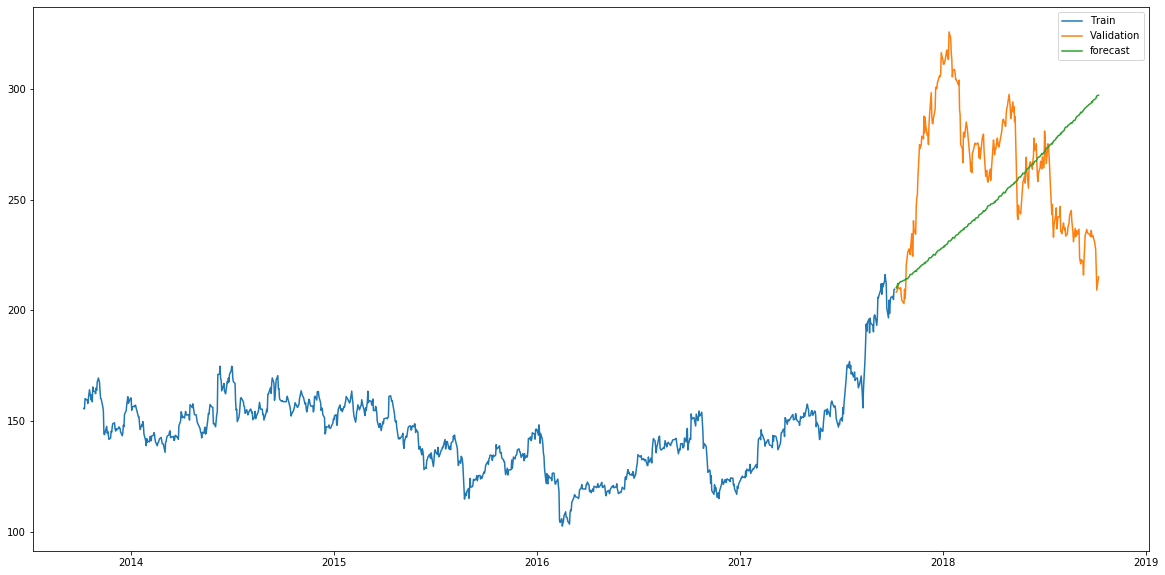

In [27]:
#plot
plt.plot(train['Close'],label='Train')
plt.plot(valid['Close'], label='Validation')
plt.plot(forecast['Prediction'], label='forecast')
plt.legend()
plt.show()

## FB Prophet

Prophet, designed and pioneered by Facebook, is a time series forecasting library that requires no data preprocessing and is extremely simple to implement. The input for Prophet is a dataframe with two columns: date and target (ds and y).

Prophet tries to capture the seasonality in the past data and works well when the dataset is large.

In [28]:
#!pip install pystan
#!pip install fbprophet

#!pip uninstall pystan --yes
!pip install --upgrade pip
!pip uninstall fbprophet --yes

Requirement already up-to-date: pip in /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (19.2.3)
Uninstalling fbprophet-0.5:
  Successfully uninstalled fbprophet-0.5


#### installing prophet
To get started with Prophet, you’ll first need to install Pystan:

Note: Prophet requres pystan, so you may need to also do the following (although in my case, it was installed as a requirement of fbprophet):

pip install pystan

Then install fbprophet
pip install fbprophet.

For those running conda, you can install prophet via conda-forge using the following command:

conda install -c conda-forge fbprophet


fbprophet 0.5 requires setuptools-git>=1.2

In [29]:
#!pip install ephem
#!pip install --upgrade setuptools #

#!pip install flask
#!pip install --upgrade pip --yes
#!pip install mysqlclient‑1.3.10‑cp35‑cp35m‑win_amd64.whl
#!conda uninstall numpy cython matplotlib scipy pandas -c conda-forge --yes
#!pip uninstall pystan --yes #
#!pip uninstall fbprophet --yes
#!conda uninstall -c conda-forge fbprophet --yes
#!pip uninstall LunarCalendar --yes


In [30]:
#importing prophet
!pip install ephem #(used)
!pip install --upgrade setuptools #(used)

#!pip install flask
#!pip install --upgrade pip --yes
#!pip install mysqlclient‑1.3.10‑cp35‑cp35m‑win_amd64.whl
!conda install numpy cython matplotlib scipy pandas -c conda-forge --yes #(used)
!pip install pystan #(used)
!pip install fbprophet #(used)
#!conda install -c conda-forge fbprophet --yes 
#!pip install LunarCalendar


import numpy as np
import pandas as pd
from fbprophet import Prophet


#creating dataframe
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])

for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

new_data['Date'] = pd.to_datetime(new_data.Date,format='%Y-%m-%d')
new_data.index = new_data['Date']

#preparing data
new_data.rename(columns={'Close': 'y', 'Date': 'ds'}, inplace=True)

#train and validation
train = new_data[:987]
valid = new_data[987:]

#fit the model
model = Prophet()
model.fit(train)

#predictions
close_prices = model.make_future_dataframe(periods=len(valid))
forecast = model.predict(close_prices)

Requirement already up-to-date: setuptools in /home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages (41.4.0)
Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.12
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



# All requested packages already installed.



INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/pystan/misc.py:399: FutureWarning:

Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.



In [31]:
#rmse
forecast_valid = forecast['yhat'][987:]
rms=np.sqrt(np.mean(np.power((np.array(valid['y'])-np.array(forecast_valid)),2)))
rms

57.49446193057514

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



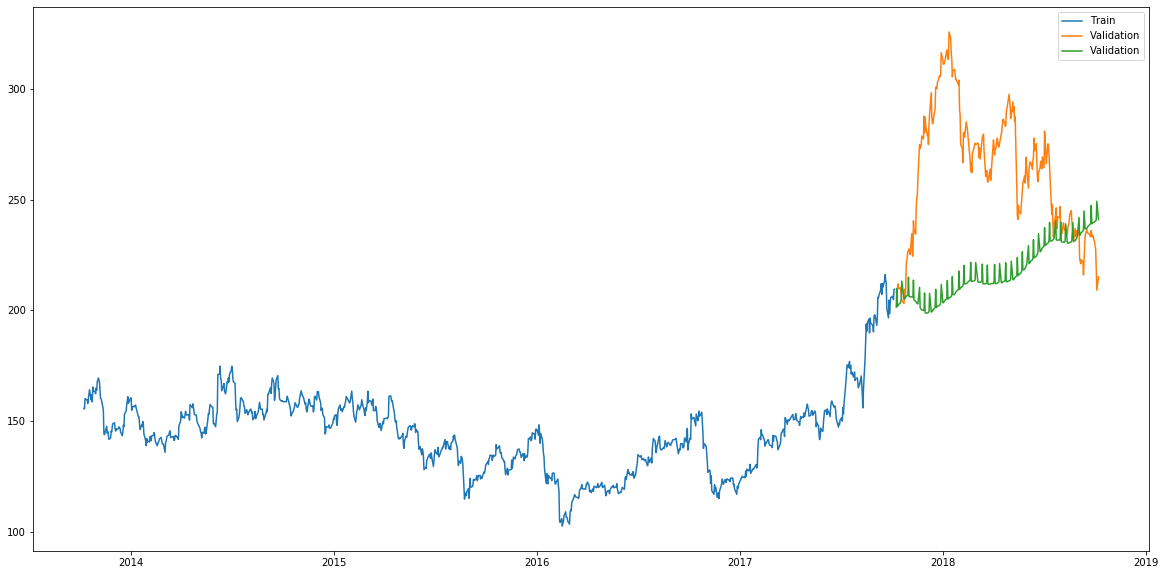

In [32]:
#plot
valid['Predictions'] = 0
valid['Predictions'] = forecast_valid.values

plt.plot(train['y'], label = 'Train')
plt.plot(valid[['y', 'Predictions']], label = 'Validation')
plt.legend()
plt.show()

In [33]:
#unistaling previous packages to clear space
#!pip uninstall ephem --yes
#!pip uninstall setuptools --yes

#!pip uninstall flask --yes
#!conda uninstall cython matplotlib scipy --yes
#!pip uninstall pystan --yes
#!conda uninstall -c conda-forge fbprophet --yes
#!pip uninstall LunarCalendar --ye



In [34]:
#!pip uninstall keras --yes
#!pip uninstall keras_contrib --yes
#!pip uninstall tensorflow --yes

In [35]:
!conda update --all --yes
!pip install --upgrade tensorflow==2.0.0-beta1 --yes

Solving environment: - 
Usage:   
  pip install [options] <requirement specifier> [package-index-options] ...
  pip install [options] -r <requirements file> [package-index-options] ...
  pip install [options] [-e] <vcs project url> ...
  pip install [options] [-e] <local project path> ...
  pip install [options] <archive url/path> ...

no such option: --yes


In [36]:
#importing required libraries
!pip install keras #(used)
#!pip install tensorflow==1.2.0 --ignore-installed

#!pip install -U tf-nightly-gpu
#!pip install --upgrade tensorflow --yes
#!pip install --upgrade --force-reinstall tf-nightly-gpu
#!pip install --upgrade pip
#!pip install tensorflow
#!git clone https://github.com/tensorflow/tensorflow.git
#!git clone https://www.github.com/keras-team/keras-contrib.git


#!pip install -U scikit-learn

In [37]:
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']




## Long Short Term Memory (LSTM)

LSTM works on the method of storing past information that is important, and forget the information that is not. LSTM has three gates:

The input gate: The input gate adds information to the cell state
The forget gate: It removes the information that is no longer required by the model
The output gate: Output Gate at LSTM selects the information to be shown as output

In [38]:
#importing required libraries
# importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM

#Reading data
df = pd.read_csv('NSE-TATAGLOBAL11.csv')
df['Date'] = pd.to_datetime(df.Date,format='%Y-%m-%d')
df.index = df['Date']

#creating dataframe
data = df.sort_index(ascending=True, axis=0)
new_data = pd.DataFrame(index=range(0,len(df)),columns=['Date', 'Close'])
for i in range(0,len(data)):
    new_data['Date'][i] = data['Date'][i]
    new_data['Close'][i] = data['Close'][i]

#setting index
new_data.index = new_data.Date
new_data.drop('Date', axis=1, inplace=True)

#creating train and test sets
dataset = new_data.values

train = dataset[0:987,:]
valid = dataset[987:,:]

#converting dataset into x_train and y_train
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)

x_train, y_train = [], []
for i in range(60,len(train)):
    x_train.append(scaled_data[i-60:i,0])
    y_train.append(scaled_data[i,0])
x_train, y_train = np.array(x_train), np.array(y_train)

x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(units=50))
model.add(Dense(1))

model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_train, y_train, epochs=1, batch_size=1, verbose=2)

#predicting 246 values, using past 60 from the train data
inputs = new_data[len(new_data) - len(valid) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = scaler.transform(inputs)

X_test = []
for i in range(60,inputs.shape[0]):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)

X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
closing_price = model.predict(X_test)
closing_price = scaler.inverse_transform(closing_price)

Using TensorFlow backend.
/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning:

Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning:

Pa

Epoch 1/1
 - 141s - loss: 0.0011


In [39]:
rms=np.sqrt(np.mean(np.power((valid-closing_price),2)))
rms

11.214791022383078

/home/ec2-user/anaconda3/envs/tensorflow_p36/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



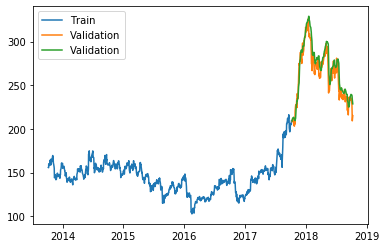

In [40]:
#to plot within notebook
import matplotlib.pyplot as plt
%matplotlib inline

train = new_data[:987]
valid = new_data[987:]
valid['Predictions'] = closing_price
plt.plot(train['Close'], label='Train')
plt.plot(valid[['Close','Predictions']], label='Validation')
plt.legend()
plt.show()